# Medical Lab Data Analysis  
### Week 5 – Matplotlib 

**Student Name:** Sai Goud Koyyala  
**Course:** Data Analytics  
**Instructor:** John Koenig  



## Project Objective

The goal of this project is to analyze a medical laboratory dataset using Python and Matplotlib.  

This analysis explores:
- The most frequently performed lab tests
- The distribution of numeric lab results
- Trends in average numeric results over time

All visualizations are created using Matplotlib's pyplot.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load dataset
df = pd.read_csv("Lab Results.csv")

In [15]:
# Convert date column
df["Date_Collected"] = pd.to_datetime(df["Date_Collected"], errors="coerce")

## Visualization 1: Top 10 Most Common Lab Tests

### Purpose:
This visualization identifies the most frequently performed laboratory tests in the dataset.

### Why This Matters:
Understanding which tests are most common helps reveal:
- Patient testing patterns
- High-demand diagnostic services
- Operational focus areas in healthcare settings

### Insight:
The dataset shows that a small group of lab tests account for a large portion of total testing volume. This suggests demand concentration in specific diagnostic areas.

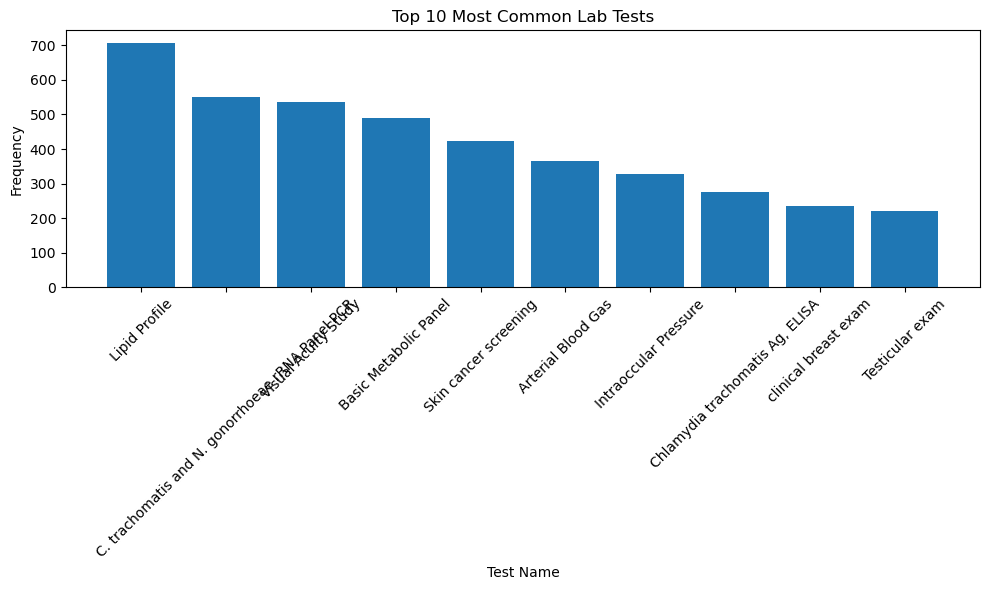

In [16]:
top_tests = df["Test_Name"].value_counts().head(10)

x_values = top_tests.index
y_values = top_tests.values

plt.figure(figsize=(10,6))
plt.bar(x_values, y_values)
plt.title("Top 10 Most Common Lab Tests")
plt.xlabel("Test Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_tests.png")
plt.show()


## Visualization 2: Distribution of Numeric Test Results

### Purpose:
This histogram shows the overall distribution of numeric lab test results.

### Why This Matters:
Examining distribution helps identify:
- Value concentration
- Spread of results
- Possible outliers
- Variation across patient results

### Insight:
The numeric test results vary significantly, indicating differences in patient measurements and test types. This variability reflects the diverse nature of laboratory diagnostics.

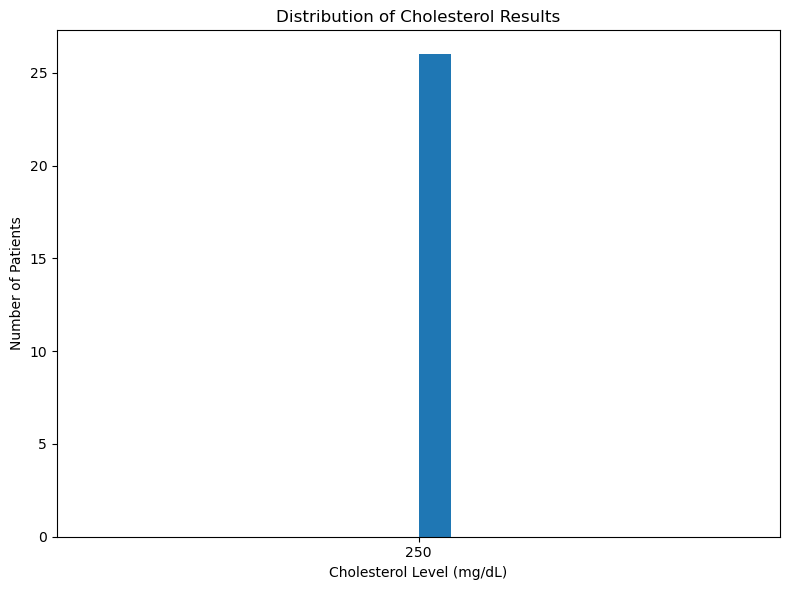

In [17]:
cholesterol_df = df[
    (df["Test_Name"].str.contains("Cholesterol", na=False)) &
    (df["Numeric_Result"].notna())
]

cholesterol_values = cholesterol_df["Numeric_Result"]

plt.figure(figsize=(8,6))
plt.hist(cholesterol_values, bins=20)
plt.title("Distribution of Cholesterol Results")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.savefig("cholesterol_distribution.png")
plt.show()

In [20]:
print(cholesterol_df["Numeric_Result"].describe())
print(cholesterol_df["Numeric_Result"].unique())

count     26.0
mean     250.0
std        0.0
min      250.0
25%      250.0
50%      250.0
75%      250.0
max      250.0
Name: Numeric_Result, dtype: float64
[250]


In [21]:
numeric_df = df.copy()

numeric_df["Numeric_Result"] = pd.to_numeric(
    numeric_df["Numeric_Result"],
    errors="coerce"
)

numeric_df = numeric_df.dropna(subset=["Numeric_Result", "Date_Collected"])

numeric_df["Year"] = numeric_df["Date_Collected"].dt.year

yearly_avg = numeric_df.groupby("Year")["Numeric_Result"].mean()

## Visualization 3: Average Numeric Test Results Over Time

### Purpose:
This line chart shows how the average numeric test results change across years.

### Why This Matters:
Trend analysis helps detect:
- Changes in testing patterns
- Shifts in patient population
- Variability across time
- Possible healthcare trends

### Insight:
The average numeric test results fluctuate year-to-year, with noticeable peaks and drops. There is no consistent upward or downward trend, suggesting variability in the types of tests performed or patient health metrics across time.

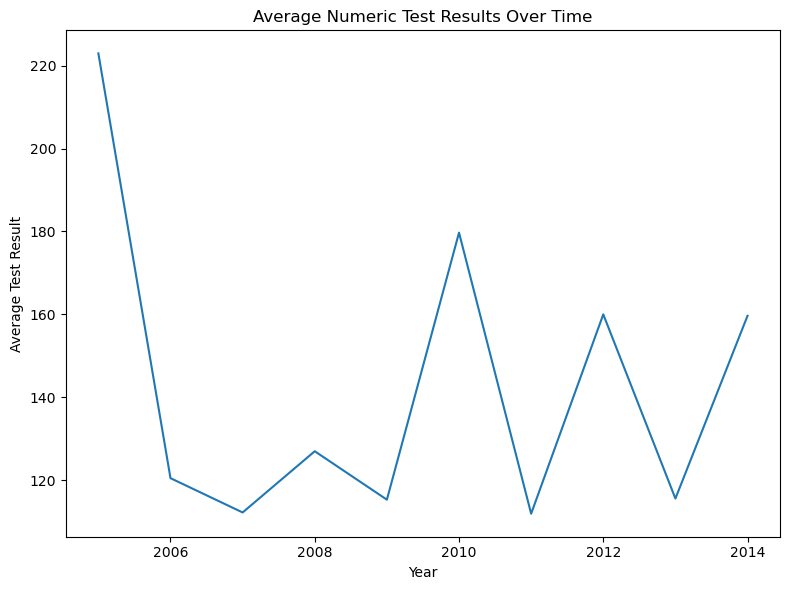

In [22]:
# Prepare x and y values
x_years = yearly_avg.index.values
y_avg = yearly_avg.values

plt.figure(figsize=(8,6))
plt.plot(x_years, y_avg)
plt.title("Average Numeric Test Results Over Time")
plt.xlabel("Year")
plt.ylabel("Average Test Result")
plt.tight_layout()
plt.savefig("numeric_trend.png")
plt.show()

# Conclusions

Based on the analysis of the medical laboratory dataset:

1. A small number of lab tests dominate overall testing volume, indicating high demand for specific diagnostic services.

2. Numeric test results show significant variability, reflecting the diversity of laboratory measurements and patient data.

3. Average numeric values fluctuate across years, suggesting changing testing patterns or differences in patient populations over time.

Overall, this analysis demonstrates how data visualization can uncover patterns, trends, and operational insights within healthcare datasets using Matplotlib's stateless interface.